# Analysis of electric bike rental data in city of Kuopio
#### *TKO_7093 project work*
Juuso Pyykkönen \
522060 \
\
Data source: https://www.avoindata.fi/data/en_GB/dataset/kuopion-kaupunkipyorien-kayttotilastot

## Preparing the data

In [164]:
import numpy as np
import pandas as pd
import scipy as sp

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

### Loading the data and checking that it is correctly loaded.

In [165]:
bike_data = pd.read_csv('bikes.data', header=0)
bike_data

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,season,0.00,7,TEATTERI,TEATTERI,3,0,0,0.0,0.0
1,single,0.35,7,TORI,TEATTERI,416,820,1,7.5,0.6
2,season,0.00,8,TORI,SATAMA,721,1230,0,0.0,2.1
3,single,0.25,5,TEATTERI,TORI,261,720,0,0.0,1.2
4,season,0.00,5,TEATTERI,TORI,382,710,1,3.3,0.9
...,...,...,...,...,...,...,...,...,...,...
1995,single,0.40,8,KYS,TORI,420,1940,1,10.3,6.0
1996,single,0.65,7,VÄINÖLÄNNIEMI,SATAMA,720,1020,0,0.0,0.0
1997,single,0.15,9,TORI,TEATTERI,172,730,1,6.6,0.3
1998,season,0.00,7,SNELLMANIA,MICROTEKNIA,211,450,0,0.0,0.3


In [166]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            2000 non-null   object 
 1   cost              2000 non-null   float64
 2   month             2000 non-null   int64  
 3   location_from     2000 non-null   object 
 4   location_to       2000 non-null   object 
 5   duration          2000 non-null   int64  
 6   distance          2000 non-null   int64  
 7   assistance        2000 non-null   int64  
 8   energy_used       2000 non-null   float64
 9   energy_collected  2000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 156.4+ KB


No null values in the data.

### Descriptions of variables.

In [167]:
variable_descriptions = pd.read_csv('bikes_variables.csv', header=0)
variable_descriptions.style

,Variable,Description,Variable type
0,ticket,ticket type,categorical
1,cost,paid fee in euros,quantitative
2,month,calendar month during which the trip was made,categorical
3,location_from,start location of the trip,categorical
4,location_to,end location of the trip,categorical
5,duration,travel time in seconds,quantitative
6,distance,travel distance in meters,quantitative
7,assistance,"status of electric assistance (0 = disabled, 1 = enabled)",categorical
8,energy_used,energy consumed by the bike in watt-hours,quantitative
9,energy_collected,energy collected by the bike in watt-hours,quantitative


Change the data type of categorical variables to 'category'.

In [168]:
categorical = variable_descriptions['Variable'].loc[variable_descriptions['Variable type'] == 'categorical']
bike_data[categorical] = bike_data[categorical].astype('category')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            2000 non-null   category
 1   cost              2000 non-null   float64 
 2   month             2000 non-null   category
 3   location_from     2000 non-null   category
 4   location_to       2000 non-null   category
 5   duration          2000 non-null   int64   
 6   distance          2000 non-null   int64   
 7   assistance        2000 non-null   category
 8   energy_used       2000 non-null   float64 
 9   energy_collected  2000 non-null   float64 
dtypes: category(5), float64(3), int64(2)
memory usage: 89.4 KB


### Calculating basic statistics for each variable.

In [169]:
bike_data.describe(exclude='category')

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.22345,539.975500,1721.93000,11.761300,4.389300
std,0.47570,593.810888,2017.79918,15.573439,5.990604
min,0.00000,1.000000,-3320.00000,0.000000,0.000000
25%,0.00000,144.750000,40.00000,0.000000,0.000000
50%,0.00000,400.000000,1130.00000,7.100000,2.400000
75%,0.30000,736.750000,2572.50000,18.500000,6.900000
max,6.95000,8292.000000,19740.00000,184.300000,91.500000


Convert negative values to positive.

In [170]:
bike_data['distance'] = bike_data['distance'].apply(lambda x: np.abs(x))
bike_data.describe()

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.22345,539.975500,1726.960000,11.761300,4.389300
std,0.47570,593.810888,2013.493714,15.573439,5.990604
min,0.00000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,144.750000,50.000000,0.000000,0.000000
50%,0.00000,400.000000,1130.000000,7.100000,2.400000
75%,0.30000,736.750000,2580.000000,18.500000,6.900000
max,6.95000,8292.000000,19740.000000,184.300000,91.500000


In [171]:
bike_data.describe(include='category')

,ticket,month,location_from,location_to,assistance
count,2000,2000,2000,2000,2000
unique,3,7,10,10,2
top,season,6,TORI,TORI,1
freq,893,488,673,756,1633


### Visualising the distribution of quantitative variables.

Check ticket costs for each type.

In [172]:
bike_data.groupby('ticket')['cost'].sum()

ticket
savonia      0.0
season       8.0
single     438.9
Name: cost, dtype: float64

In [173]:
bike_data.loc[bike_data['ticket'] == 'season'].loc[bike_data['cost'] == 1]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
119,season,1.0,7,VÄINÖLÄNNIEMI,MICROTEKNIA,2232,6520,1,62.0,10.2
296,season,1.0,7,UIMAHALLI,RYPYSUO,2946,6000,1,47.8,15.9
741,season,1.0,5,TORI,TORI,2851,3920,0,0.0,9.0
785,season,1.0,8,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2286,4370,1,31.7,12.0
1091,season,1.0,6,MICROTEKNIA,PETONEN,2014,6810,0,0.0,13.5
1323,season,1.0,8,TORI,SATAMA,1856,2770,1,22.4,7.5
1469,season,1.0,6,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2422,7110,1,36.0,9.9
1630,season,1.0,7,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,3268,8940,1,80.6,21.9


Only single tickets have a per-trip-cost. The cost on seasonal tickets is assumed to be an extra cost for long distance trips.

Text(0.5, 1.0, 'Single ticket costs')

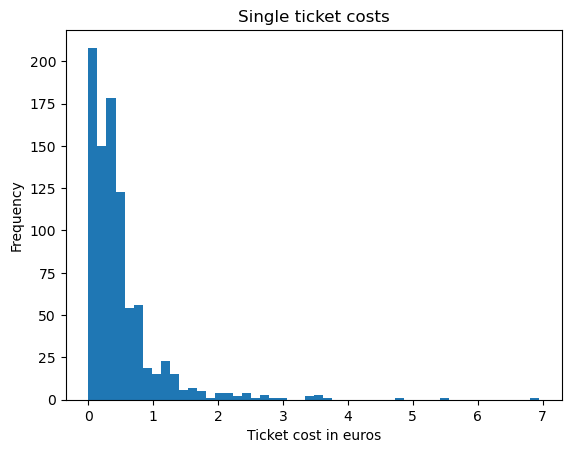

In [174]:
ax_cost = bike_data.loc[bike_data['ticket'] == 'single'].plot.hist(column='cost', bins=50, range=(0,bike_data['cost'].max()), legend=False)
# Set xlabel to the ax because it did not work as an argument to hist()
ax_cost.set_xlabel('Ticket cost in euros')
ax_cost.set_title('Single ticket costs')


Text(0.5, 1.0, 'Rental duration')

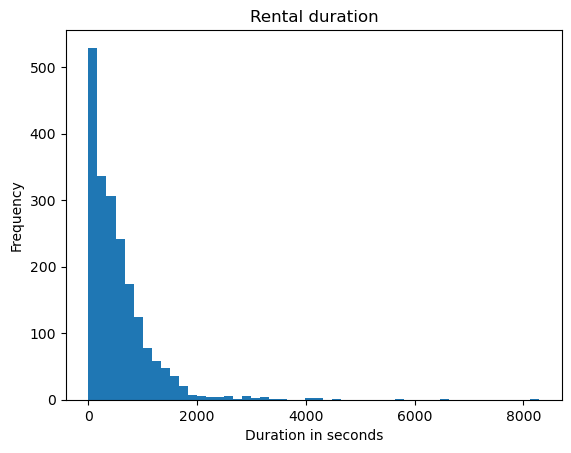

In [175]:
ax_duration = bike_data.plot.hist(column='duration', bins=50, range=(0,bike_data['duration'].max()), legend=False)
ax_duration.set_xlabel('Duration in seconds')
ax_duration.set_title('Rental duration')

Text(0.5, 1.0, 'Travel distance')

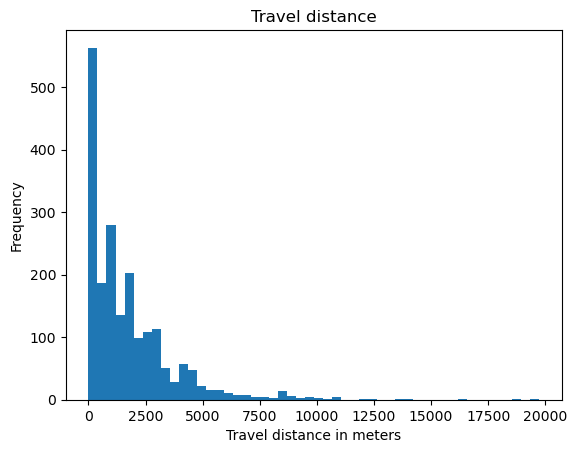

In [176]:
ax_distance = bike_data.plot.hist(column='distance', bins=50, range=(0,bike_data['distance'].max()), legend=False)
ax_distance.set_xlabel('Travel distance in meters')
ax_distance.set_title('Travel distance')

Setting zero values to NaN.

In [177]:
bike_data['distance'] = bike_data['distance'].replace(0, np.nan)
bike_data['distance'].value_counts(dropna=False)

NaN       430
930.0      40
940.0      37
710.0      35
10.0       32
         ... 
3480.0      1
6050.0      1
6140.0      1
220.0       1
4800.0      1
Name: distance, Length: 479, dtype: int64

Energy used is considered only when assistance was used.

<AxesSubplot:title={'center':'Energy used when assistance was used'}, xlabel='Energy used in watt-hours', ylabel='Frequency'>

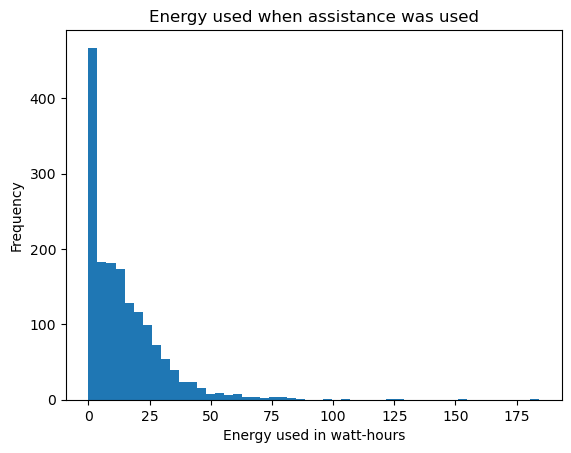

In [178]:
ax_energy_used = bike_data.loc[bike_data['assistance'] == 1].plot.hist(column='energy_used', bins=50, range=(0,bike_data['energy_used'].max()), legend=False)
ax_energy_used.set_xlabel('Energy used in watt-hours')
ax_energy_used.set_title('Energy used when assistance was used')
ax_energy_used

<AxesSubplot:title={'center':'Energy collected'}, xlabel='Energy collected in watt-hours', ylabel='Frequency'>

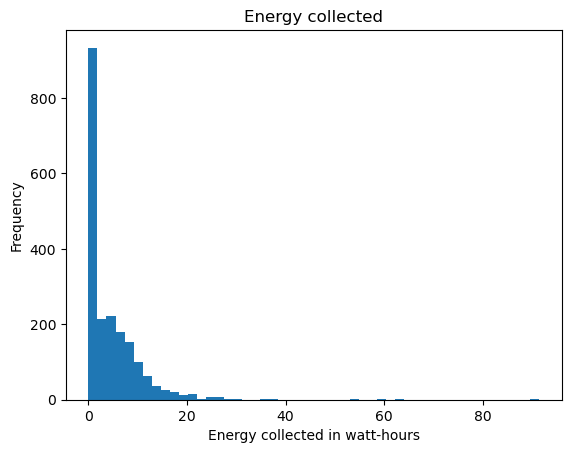

In [179]:
ax_energy_collected = bike_data.plot.hist(column='energy_collected', bins=50, range=(0,bike_data['energy_collected'].max()), legend=False)
ax_energy_collected.set_xlabel('Energy collected in watt-hours')
ax_energy_collected.set_title('Energy collected')
ax_energy_collected

### Visualising the distribution of categorical variables.

<AxesSubplot:title={'center':'Ticket counts'}>

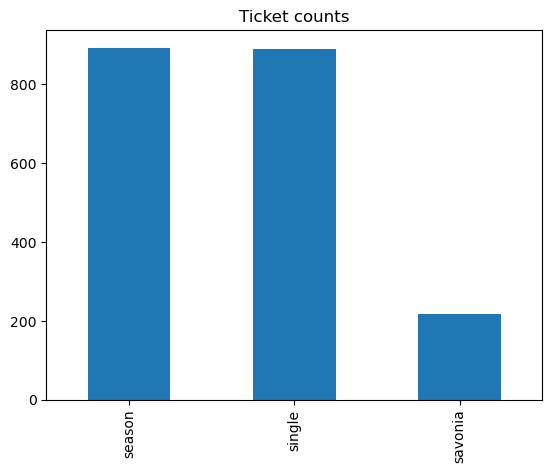

In [180]:
bike_data['ticket'].value_counts().plot.bar(title='Ticket counts')

<AxesSubplot:title={'center':'Monthly rentals'}>

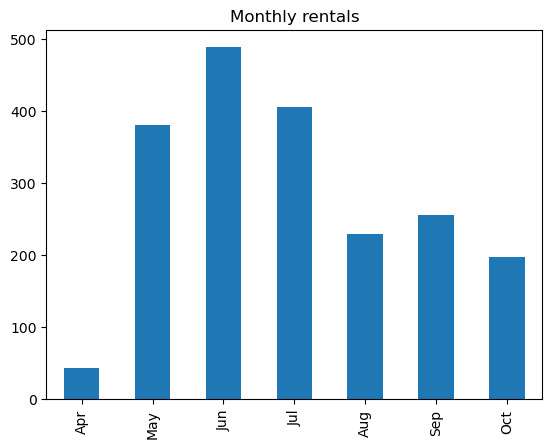

In [181]:
import calendar
bike_data_month = bike_data['month'].apply(lambda x: calendar.month_abbr[x])
bike_data_month.value_counts(sort=False).plot.bar(title='Monthly rentals')

<AxesSubplot:title={'center':'Rental start location'}>

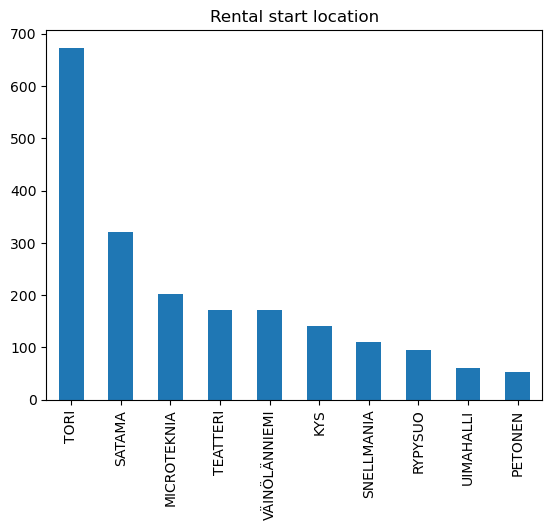

In [182]:
bike_data['location_from'].value_counts().plot.bar(title='Rental start location')

<AxesSubplot:title={'center':'Rental end location'}>

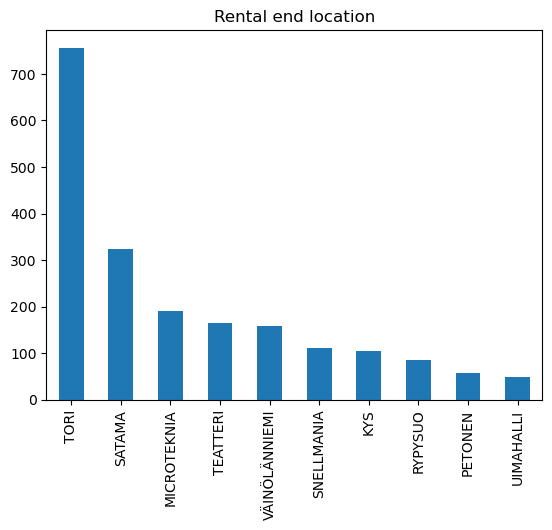

In [183]:
bike_data['location_to'].value_counts().plot.bar(title='Rental end location')

<AxesSubplot:title={'center':'Assistance used'}>

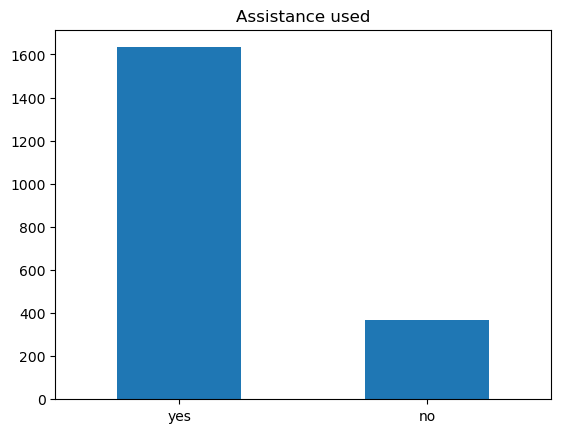

In [184]:
ax_assistance = bike_data['assistance'].value_counts().plot.bar(title='Assistance used')
ax_assistance.set_xticklabels(['yes', 'no'], rotation=0)
ax_assistance

## Data exploration

### Calculating the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type.

In [185]:
bike_data.groupby('ticket')[['distance', 'duration', 'cost']].sum()

,distance,duration,cost
ticket,,,
savonia,408590.0,122618,0.0
season,1419250.0,459643,8.0
single,1626080.0,497690,438.9


Taking a closer look in season ticket costs.

In [186]:
bike_data.loc[bike_data['ticket'] == 'season'].loc[bike_data['cost'] == 1]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
119,season,1.0,7,VÄINÖLÄNNIEMI,MICROTEKNIA,2232,6520.0,1,62.0,10.2
296,season,1.0,7,UIMAHALLI,RYPYSUO,2946,6000.0,1,47.8,15.9
741,season,1.0,5,TORI,TORI,2851,3920.0,0,0.0,9.0
785,season,1.0,8,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2286,4370.0,1,31.7,12.0
1091,season,1.0,6,MICROTEKNIA,PETONEN,2014,6810.0,0,0.0,13.5
1323,season,1.0,8,TORI,SATAMA,1856,2770.0,1,22.4,7.5
1469,season,1.0,6,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2422,7110.0,1,36.0,9.9
1630,season,1.0,7,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,3268,8940.0,1,80.6,21.9


Only single tickets have a per-trip-cost. The cost on seasonal tickets is assumed to be an extra cost for long distance trips.

### Calculating the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance.

In [187]:
grouped_assistance = bike_data.groupby('assistance')[['distance', 'energy_used', 'energy_collected']].mean()
grouped_assistance = grouped_assistance.rename(index={0: 'no', 1:'yes'})
grouped_assistance

,distance,energy_used,energy_collected
assistance,,,
no,1491.116279,0.000000,1.661853
yes,2312.420664,14.404532,5.002266


In [188]:
print(grouped_assistance['energy_collected']/grouped_assistance['distance'] )

assistance
no     0.001115
yes    0.002163
dtype: float64


Based on the mean values, the bikes collect more energy per distance travelled when assistance is used.

### Finding the three most popular locations per ticket type in terms of the number of trips that either started or ended at the location.

In [189]:
grouped_ticket_location = bike_data.groupby('ticket')[['location_from', 'location_to']]
trips = grouped_ticket_location.apply(lambda row: row['location_from'].value_counts() + row['location_to'].value_counts())
trips = trips.transpose()
trips

ticket,savonia,season,single
KYS,24,124,99
MICROTEKNIA,140,133,120
PETONEN,4,65,42
RYPYSUO,13,87,81
SATAMA,42,288,314
SNELLMANIA,44,86,92
TEATTERI,26,151,159
TORI,127,631,671
UIMAHALLI,10,57,41
VÄINÖLÄNNIEMI,6,164,159


Check that the sum of all locations is double the amount of trips made i.e. 4000.

In [190]:
trips.values.sum()

4000

Calculate most popular locations.

In [191]:
savo = trips['savonia'].nlargest(n=3).index.to_numpy()
seas = trips['season'].nlargest(n=3).index.to_numpy()
sing = trips['single'].nlargest(n=3).index.to_numpy()
popular = pd.DataFrame({'savonia': savo, 'season': seas, 'single': sing}, index=['1st', '2nd', '3rd'])

#### Most popular locations are:

In [192]:
popular

,savonia,season,single
1st,MICROTEKNIA,TORI,TORI
2nd,TORI,SATAMA,SATAMA
3rd,SNELLMANIA,VÄINÖLÄNNIEMI,TEATTERI


Tori is the overall most popular location for starting and ending rentals.

### Visualising monthly rental activity per ticket type in terms of total distance travelled.

<AxesSubplot:title={'center':'Monthly rental activity'}, xlabel='Ticket type', ylabel='Total distance travelled in meters'>

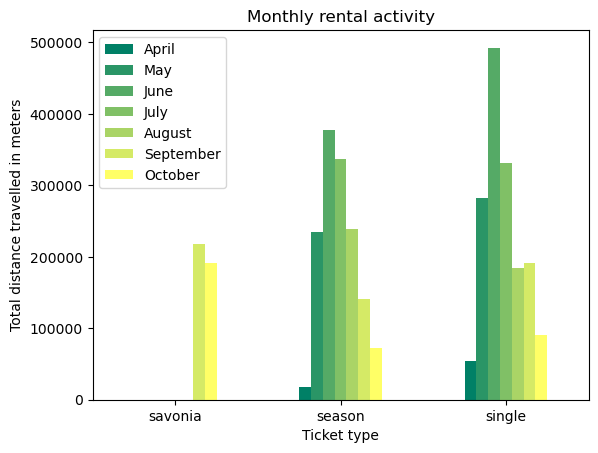

In [193]:
monthly_distance = bike_data.groupby(['ticket',  'month'])['distance'].sum()
ax_monthly = monthly_distance.unstack().plot.bar(title='Monthly rental activity', xlabel='Ticket type', ylabel='Total distance travelled in meters', rot=0, colormap='summer')
month_dict = {'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10}
ax_monthly.legend(month_dict)
ax_monthly

### Visualising the distribution of net energy gain, which is defined as the difference between the energy collected and consumed during a trip.

Text(0.5, 0, 'Net energy in watt-hours')

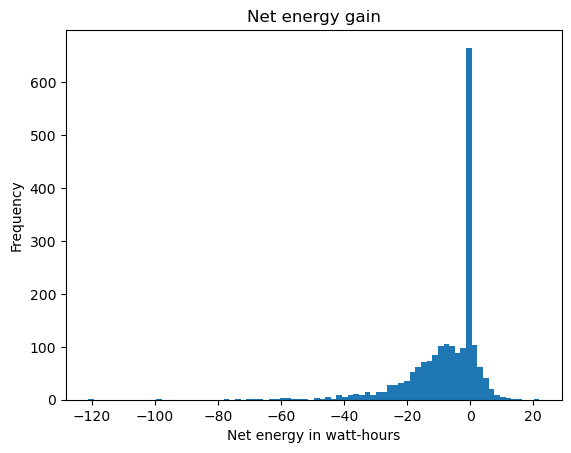

In [194]:
net_energy = bike_data['energy_collected'] - bike_data['energy_used']
ax_energy = net_energy.plot.hist(bins=80)
ax_energy.set_title('Net energy gain')
ax_energy.set_xlabel('Net energy in watt-hours')

In [195]:
print('Mode: ' + str(net_energy.mode()[0]))

Mode: 0.0


### Visualising the pairwise relationships between the quantitative variables.

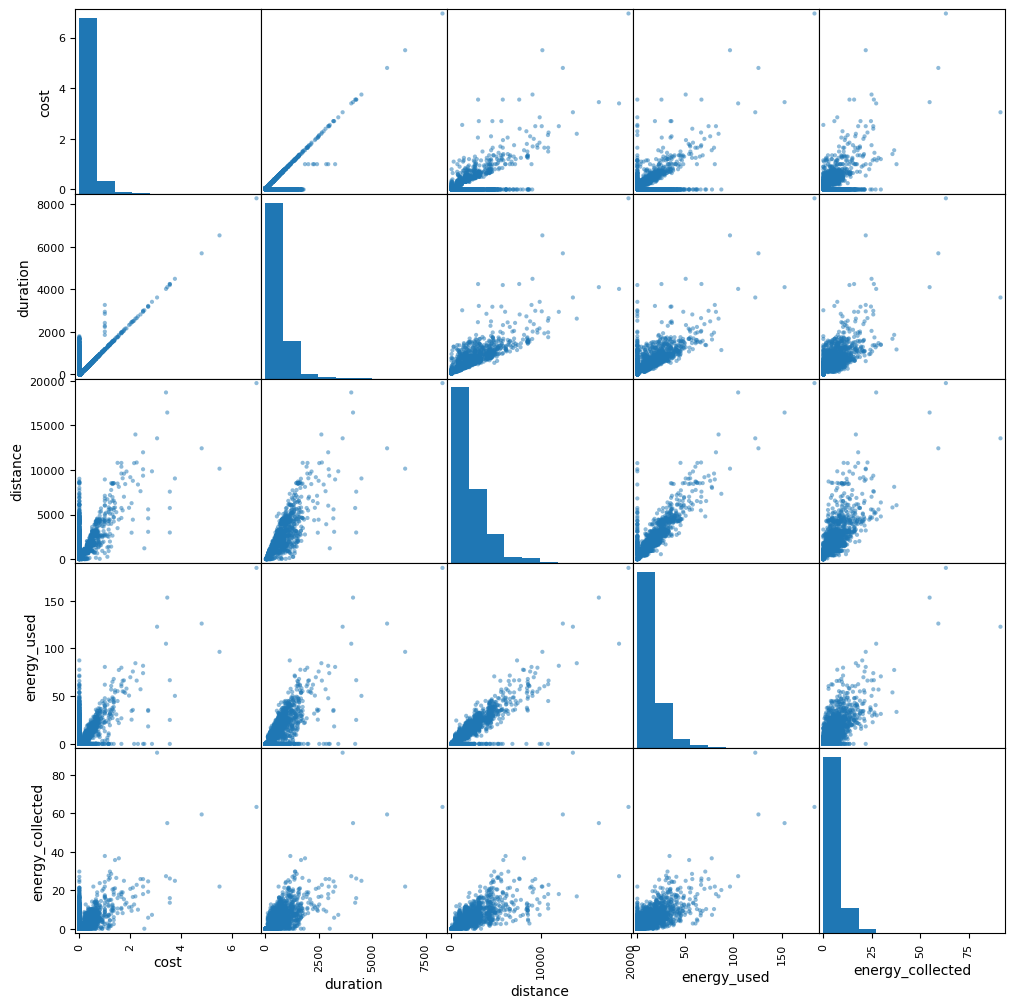

In [196]:
matrix = pd.plotting.scatter_matrix(bike_data, figsize=(12,12))

Cost is linearly dependent on duration when using a single ticket.

# Hypothesis testing

### *Explain what the p-value of a statistical test means and how it can be used to make conclusions.*

First a null hypothesis is formed. The null hypothesis for statistical significance is usually that there is no statistical significance. Then it is assumed that the null hypothesis is true. Then the P-value is the probability of getting this result from the statistical test. A typical treshold value for P-value is 0.05. It means that if the P-value is less than 0.05, the null hypothesis can be rejected and there is evidence of statistical significance. If the P-value is greater than or equal to 0.05, definitive conclusions about the statistical significance cannot be made from the statistical test result.

### *Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type?*

In [197]:
grouped_ticket_duration = bike_data.groupby('ticket')['duration']
duration_single = grouped_ticket_duration.get_group('single')
duration_season = grouped_ticket_duration.get_group('season')

The duration data is not normally ditributed based on the graph. Shapiro-Wilk test can be used to confirm it.

In [198]:
sp.stats.shapiro(duration_single)

ShapiroResult(statistic=0.6383874416351318, pvalue=1.314204962170101e-39)

In [199]:
sp.stats.shapiro(duration_season)

ShapiroResult(statistic=0.8857890367507935, pvalue=3.960843734540116e-25)

The P-values are very low which indicates that the data is not normally distributed.

Comparing mean values.

In [200]:
duration_single.mean()

559.8312710911136

In [201]:
duration_season.mean()

514.7178051511759

In [202]:
duration_single.mean() / duration_season.mean()

1.0876469892598484

Single ticket mean value is 9% greater than than season mean value.

Because the data is not normally distributed and samples are independent, Mann-Whitney *U* test can be used to determine if there is statistical evidence of one group's values being larger than the other's. Null hypothesis is that the groups are identical.

In [203]:
sp.stats.mannwhitneyu(duration_single, duration_season)

MannwhitneyuResult(statistic=387090.5, pvalue=0.3645632872998459)

#### Conclusion

The P-value is greater than 0.05 which means that the null hypothesis cannot be rejected and the groups might be identical. There is no statistical evidence that travel times end to be shorter or longer for the single than for the season ticket type.

### *Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?*

Pearson's chi-squared test for statistical independence can be used because the variables are categorical. The test determines whether two categorical variables are related. In this case the relation between ticket type and electric assistance. Null hypothesis is that ticket type and assistance are not related.

In [204]:
grouped_ticket_assistance = bike_data.groupby('ticket')['assistance']
assistance_single = grouped_ticket_assistance.get_group('single').value_counts()
assistance_savonia = grouped_ticket_assistance.get_group('savonia').value_counts()

In [205]:
cont_table = pd.DataFrame([assistance_single, assistance_savonia], index=['single', 'savonia'])
cont_table

,1,0
single,698,191
savonia,209,9


In [206]:
print('P-value: ' +  str(sp.stats.chi2_contingency(cont_table)[1]))

P-value: 4.3404376688598015e-09


#### Conclusion

The P-value is less than 0.05 and very low which means that the null hypothesis can be rejected. There is statistical evidence that the single and savonia ticket types differ with respect to how often the electric assistance is used.

### *Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others?*

Testing for normality with Shapiro-Wilk test.

In [207]:
grouped_month_distance = bike_data.groupby('month')['distance']
for name, group in grouped_month_distance:
    print(sp.stats.shapiro(grouped_month_distance.get_group(name).dropna()))

ShapiroResult(statistic=0.897064745426178, pvalue=0.006093836855143309)
ShapiroResult(statistic=0.7974337935447693, pvalue=8.720789008676097e-18)
ShapiroResult(statistic=0.7381541728973389, pvalue=4.7942015717152836e-24)
ShapiroResult(statistic=0.7458085417747498, pvalue=6.999988670697112e-22)
ShapiroResult(statistic=0.8736541271209717, pvalue=5.750142029192773e-11)
ShapiroResult(statistic=0.7975080013275146, pvalue=1.854974890613928e-16)
ShapiroResult(statistic=0.9349409341812134, pvalue=4.709424956672592e-07)


P-values are less than 0.05. Distance values are not normally distributed.

In [208]:
grouped_month_distance.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
4,31.0,2305.806452,1747.279360,10.0,750.0,2350.0,3100.0,8370.0
5,263.0,1967.756654,1894.757307,10.0,730.0,1500.0,2660.0,12430.0
6,380.0,2291.526316,2355.667569,10.0,930.0,1595.0,2727.5,18690.0
7,321.0,2078.504673,2059.616076,10.0,910.0,1510.0,2680.0,19740.0
8,175.0,2418.571429,1904.098639,10.0,1055.0,2050.0,3150.0,10800.0
9,227.0,2424.449339,2056.064854,10.0,950.0,1900.0,3105.0,16440.0
10,173.0,2042.427746,1416.316013,10.0,930.0,1870.0,2990.0,8110.0


In [209]:
# Individual arrays for each month because of sp.stats.kruskal()
apr = grouped_month_distance.get_group(4).dropna()
may = grouped_month_distance.get_group(5).dropna()
jun = grouped_month_distance.get_group(6).dropna()
jul = grouped_month_distance.get_group(7).dropna()
aug = grouped_month_distance.get_group(8).dropna()
sep = grouped_month_distance.get_group(9).dropna()
octb = grouped_month_distance.get_group(10).dropna()

Kruskal-Wallis *H* test can be used to determine if there are statistically significant differences between two or more groups of an independent variable. Null hypothesis is that there is no significant differences between groups.

In [210]:
sp.stats.kruskal(apr, may, jun, jul, aug, sep, octb)

KruskalResult(statistic=22.337651787668722, pvalue=0.0010515522965106534)

#### Conclusion

P-value is less than 0.05 which means the null hypothesis can be rejected. There is statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others.

### *Is there statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled?*

Spearman's rank correlation coefficient is used here rather than Pearson correlation coefficient because the graph looks more monotonic than linear and there are NaN values in the distance data. Null hypothesis is that the variables are not correlated.

In [211]:
assisted = bike_data.loc[bike_data['assistance'] == 1]
sp.stats.spearmanr(assisted['distance'], assisted['energy_used'], nan_policy='omit')

SpearmanrResult(correlation=0.9079399786435489, pvalue=0.0)

#### Conclusion

P-value is less than 0.05 and very small which menas that the null hypothesis can be rejected. There is strong statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled.

### *Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?*

Pearson's chi-squared test for statistical independence can be used because the variables are categorical. The test determines whether two categorical variables are related. In this case the relation between ticket type and the starting point and the destination being the same location. Null hypothesis is that they are not related.

In [212]:
ticket_savonia = bike_data.loc[bike_data['ticket'] == 'savonia']
ticket_season = bike_data.loc[bike_data['ticket'] == 'season']

savonia_same_locations = ticket_savonia.loc[bike_data['location_from'] == bike_data['location_to']]
season_same_locations = ticket_season.loc[bike_data['location_from'] == bike_data['location_to']]

In [213]:
cont_table_location = pd.DataFrame([[len(savonia_same_locations.index), len(season_same_locations.index)], \
                                    [len(ticket_savonia.index), len(ticket_season.index)]],\
                                    index=['savonia', 'season'], \
                                    columns=['same_locations', 'total_trips'])
cont_table_location

,same_locations,total_trips
savonia,76,367
season,218,893


Calculating ratios of trips starting and ending at the same location for both ticket types.

In [214]:
cont_table_location['same_locations'] / cont_table_location['total_trips']

savonia    0.207084
season     0.244121
dtype: float64

A difference of 0.04. 

Pearson's chi-squared test:

In [215]:
print('P-value: ' +  str(sp.stats.chi2_contingency(cont_table_location)[1]))

P-value: 0.2942350943012959


### Conclusion

P-value is greater than 0.05 which means that the null hypothesis cannot be rejected. There is no statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started

### *Is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made?*

Both Pearson correlation coefficient and Spearman correlation coefficient can be used. Null hypothesis is that the data is not correlated.

Convert NaN values back to zero.

In [216]:
distance_zeros = bike_data['distance'].replace(np.nan, 0)

Calculating average speeds.

In [217]:
avg_speed = distance_zeros / bike_data['duration']

Pearson correlation coefficient:

In [218]:
sp.stats.pearsonr(distance_zeros, avg_speed)

PearsonRResult(statistic=0.6012011589514767, pvalue=7.358154606080721e-197)

Spearman correlation coefficient:

In [219]:
sp.stats.spearmanr(distance_zeros, avg_speed)

SpearmanrResult(correlation=0.7759526634610828, pvalue=0.0)

### Conclusion

P-value of both tests is less than 0.05 and very low which means null hypothesis can be rejected. There is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made.